In [33]:
import numpy as np
import matplotlib.pyplot as plt

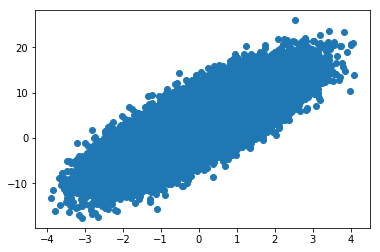

In [34]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4. * x + 3. + np.random.normal(0, 3, size=m)
plt.scatter(x, y)
plt.show()

# 使用梯度下降

In [42]:
# 损失函数
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)

# 计算梯度
def dJ(theta, X_b, y):
    return (X_b.T.dot(X_b.dot(theta) - y)) * 2 / len(X_b)

# 梯度下降
def gradient_descent(X_b, y, initial_theta, eta, i_ters=1e4,  epsilon=1e-8):
    theta = initial_theta
    i_ter = 0
    while i_ter < i_ters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - gradient * eta
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        i_ter += 1
    return theta

In [43]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

In [44]:
theta

array([3.01085032, 3.99996783])

# 随机梯度下降

In [45]:
# 计算梯度
def dJ_sgd(theta, X_b_i, y_i):
    return (X_b_i.T.dot(X_b_i.dot(theta) - y_i)) * 2

In [46]:
def sgd(X_b, y, initial_theta, n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t1 + t)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [50]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

In [54]:
theta

array([2.94522643, 3.9879299 ])